In [1]:
import tweepy
import time
import pandas as pd

In [2]:
access_token = "2413986637-DtjxGNmKYarpRwwqKK95A1r8S5dX5Fyq2ta3E2K"
access_token_secret = "x75c1CKuNXJHzZq4RZHKWsxyVMhOIrL15K5o9HMdnJVO2"
consumer_key = "CT2cCmaVGPpzO3IL3bDdTkctQ"
consumer_secret = "8AkR9SqifUBwgs8hKpYHVkOG9rdmvmLDzAApiXcfyZcVpJMZiK"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [4]:
me = api.get_user(screen_name ='SamsungMobile')
me.id

297169759

In [5]:
user_list = ["297169759"]
follower_list = []
a = 0
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
            if (len(followers) == 5000):
                break
    except tweepy.TweepError:
        print("error")
        continue

5000


In [6]:
df = pd.DataFrame(columns=['source','target']) 
a = 0
for i in followers:
    if (a < 100):
        me = api.get_user(i)
        follower_list.append(me.screen_name)
        a = a + 1
df['target'] = follower_list 
ss = api.get_user(297169759)
df['source'] = ss.screen_name

In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

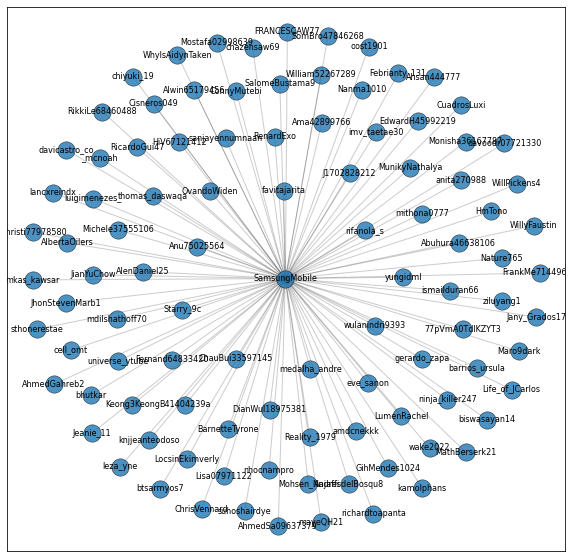

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [9]:
user_list = list(df['target']) 
for userID in user_list:
    print(userID)
    try:
        uuid = api.get_user(screen_name =userID)
        followers = []
        follower_list = []
        user = api.get_user(uuid.id)
        followers_count = user.followers_count
        try:
            time.sleep(60)
            for page in tweepy.Cursor(api.followers_ids, user_id=uuid.id).pages():
                followers.extend(page)
                print(len(followers))
                if followers_count >= 5000: #Only take first 5000 followers
                    break
        except tweepy.TweepError:
            print("error")
            continue
        temp = pd.DataFrame(columns=['source', 'target'])
        for i in followers:
            try:
                me = api.get_user(i)
                follower_list.append(me.screen_name)
            except:
                print("error")
                continue
        temp['target'] = follower_list
        temp['source'] = uuid.screen_name
        df = df.append(temp)
        df.to_csv("networkOfFollowers_Samsung.csv")
    except:
        print("User not found")

gerardo_zapa
7
B41404239a
knjjeanteodoso
10
Christi77978580
10
Starry_9c
7
Alwin65179456
Ama42899766
1
HmTono
lancxreindx
error
sthonerestae
User not found
ziluyang1
2
bhutkar
25
mdilshathoff70
AlenDaniel25
6
JianYuChow
6
chazensaw69
1
RicardoGui47
1
Michele37555106
45
FRANCESCAW77
27
GihMendes1024
J1702828212
Fernand64833420
5
MathBerserk21
4
Nanma1010
77pVmA0TdlKZYT3
nhocnampro
davicastro_co
sanjayennumnaan
medalha_andre
1
Reality_1979
11
Monisha36167787
1
LumenRachel
Nature765
1
imv_taetae30
69
HiV67121412
btsarmyos7
11
leza_yne
7
_mcnoah
mkas_kawsar
1
FrankMe71449674
1
SomBro47846268
Jeanie_11
error
BarnetteTyrone
44
ninja_killer247
25
WillPickens4
74
eve_sanon
3
SalomeBustama9
1
Mohsen_Najaffi
1211
error


Rate limit reached. Sleeping for: 393


error
WillyFaustin
28
ChrisVennard
4
Jany_Grados17
3
ConnyMutebi
5
Maro9dark
5
thomas_daswaqa
1
amdcnekkk
wulanindri9393
AhmedSa09637379
1
barrios_ursula
9
AhmedGahreb2
richardtoapanta
error
Anu75025564
AlbertaOilers
40
Febrianty_131
2
anita270988
5
AndresdelBosqu8
76
RenardExo
1
William52267289
1
luigimenezes_
10
oost1901
biswasayan14
ismailduran66
3818


Rate limit reached. Sleeping for: 28
Rate limit reached. Sleeping for: 628


error


Rate limit reached. Sleeping for: 628


error


Rate limit reached. Sleeping for: 624


error
DianWul18975381
RikkiLe68460488
12
kamolphans
error
LocsinEkimverly
8
Lisa07971122
1
Life_of_JCarlos
ChauBui33597145
3
JhonStevenMarb1
2
Cisneros049
rifanola_s
wake2022
Abuhura46638106
mithona0777
12
OvandoWiden
26
Keong3Keong
Ahsan444777
Mostafa02998639
1
universe_ytube
yungidml
1
mayeQH21
10
WhyIsAidynTaken
CuadrosLuxi
22
davoodr07721330
3
cell_omt
chiyuki_19
suhoshairdye
32
MunikyNathalya
38
EdwardH45992219
31
favitajarita
17


In [10]:
df1 = pd.read_csv("networkOfFollowers_Samsung.csv") #Read into a df
G = nx.from_pandas_edgelist(df1, 'source', 'target')

In [11]:
G.number_of_nodes() #Find the total number of nodes in this graph

5940

In [12]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,ismailduran66,3816
1,Mohsen_Najaffi,1210
2,SamsungMobile,100
3,AndresdelBosqu8,77
4,WillPickens4,75


In [13]:
nx.write_gexf(G, 'Samsung.gexf')